In [22]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# Flexible Image Transport System

FITS is a portable file standard widely used in the astronomy community to store images and tables. 

In [23]:
with fits.open('fits_images/mean/image0.fits') as hdul:
    hdul.info()

Filename: fits_images/mean/image0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


### HUDS

An HDU (Header Data Unit) is the highest level component of the FITS file structure, consisting of a header and (typically) a data array or table..

The open function returns an object called an HDUList which is a list-like collection of HDU objects. 

In [24]:
hdul = fits.open('fits_images/mean/image0.fits')

In [25]:
print (hdul[0].data, "\n\n The shape of the image is: ", hdul[0].shape)

[[-0.00319621 -0.0008495   0.00241029 ... -0.00395876 -0.00044348
  -0.00068918]
 [ 0.00047027 -0.00116831 -0.00097984 ... -0.0025309  -0.0029578
   0.00056235]
 [-0.00398995 -0.0014535  -0.00069149 ... -0.00140105 -0.00352348
  -0.00031844]
 ...
 [-0.0040899  -0.00576512 -0.00548605 ... -0.00326335 -0.00336867
   0.00071865]
 [-0.00648206 -0.0040749  -0.00342054 ... -0.00481083 -0.00295951
  -0.00204938]
 [-0.00437305 -0.00450521 -0.00194182 ... -0.00775742 -0.00532724
  -0.00222068]] 

 The shape of the image is:  (200, 200)


### Visualizing a fits file

In [37]:
def plot_image(image):
    plt.imshow(hdul[0].data)
    plt.xlabel('x-pixels (RA)')
    plt.ylabel('y-pixels (Dec)')
    plt.colorbar()
    return plt.show()

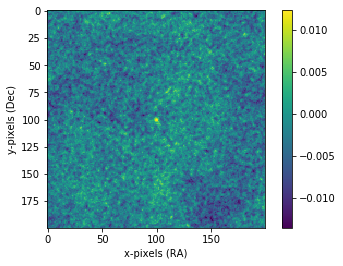

In [39]:
plot_image(hdul[0])

### Find the brightest pixel.

In [27]:
def brightest_pixel(image):
    # Given an FITS image returns the value and location of the brightest pixel.
    return (np.argmax(image.data), np.unravel_index(np.argmax(image.data), image.shape))

In [28]:
brightest_pixel(hdul[0])

(20100, (100, 100))

### Display all images in one plot. 

In [29]:
img0 = hdul[0]
img1 = fits.open('fits_images/mean/image1.fits')[0]
img2 = fits.open('fits_images/mean/image2.fits')[0]
img3 = fits.open('fits_images/mean/image3.fits')[0]
img4 = fits.open('fits_images/mean/image4.fits')[0]

<Figure size 1080x1080 with 0 Axes>

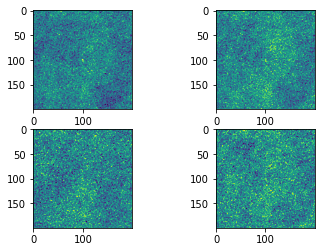

In [30]:
plt.figure(figsize=(15,15))

#subplot(r,c) provide the no. of rows and columns
_, axarr = plt.subplots(2,2) 

# use the created array to output your multiple images. 
axarr[0][0].imshow(img0.data)
axarr[0][1].imshow(img1.data)
axarr[1][0].imshow(img2.data)
axarr[1][1].imshow(img3.data)

### Stack images by mean

In [34]:
def mean_stack(images):
    mean_image = np.empty(shape = images[0].shape)
    
    for image in images:
        mean_image += image.data
    
    return mean_image/len(images)

In [35]:
images = [img0, img1, img2, img3, img4]

In [36]:
mean_image = mean_stack(images)

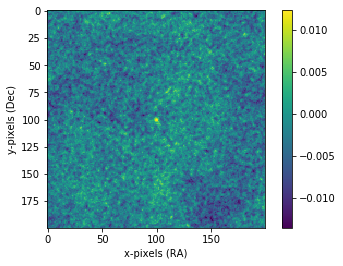

In [38]:
plot_image(mean_image)

In [40]:
brightest_pixel(mean_image)

(20300, (101, 100))